# EDA AND FEATURE ENGINEERING

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
directory_name = "Cleaned DATA"
if not os.path.exists(directory_name):
    os.makedirs(directory_name)

In [3]:
path = "Cleaned DATA"

csv_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

dfs = [pd.read_csv(f) for f in csv_files]

#Merging the dataframes on the 'DATE' column
df_final = pd.concat(dfs, ignore_index = False).groupby('DATE').sum()

In [4]:
df_final.head()

,emratio,gdp,home_ow_rate,House_starts,income,labor_percent,monthly_supply,mortgage,MspUS,new_private_hw_under,permit,population,p_saving_rate,target,total_emp_cons,unemployed_rate
DATE,,,,,,,,,,,,,,,,
1987-01-01,61.0,4722.156,63.9,1774.0,3820.2,65.4,6.0,9.2040,97900.0,1090.0,1690.0,241857.0,9.4,63.735,5007.0,6.6
1987-02-01,61.1,4722.156,63.9,1784.0,3845.0,65.5,6.2,9.0825,97900.0,1096.0,1689.0,242005.0,8.2,64.135,5038.0,6.6
1987-03-01,61.2,4722.156,63.9,1726.0,3863.8,65.5,6.0,9.0350,97900.0,1084.0,1704.0,242166.0,8.1,64.470,5039.0,6.6
1987-04-01,61.3,4806.160,63.9,1614.0,3875.4,65.4,6.0,9.8325,103400.0,1079.0,1601.0,242338.0,4.1,64.973,5053.0,6.3
1987-05-01,61.6,4806.160,63.9,1628.0,3908.6,65.7,6.7,10.5960,103400.0,1070.0,1500.0,242516.0,7.8,65.547,5080.0,6.3


In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 1987-01-01 to 2023-07-01
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   emratio               439 non-null    float64
 1   gdp                   439 non-null    float64
 2   home_ow_rate          439 non-null    float64
 3   House_starts          439 non-null    float64
 4   income                439 non-null    float64
 5   labor_percent         439 non-null    float64
 6   monthly_supply        439 non-null    float64
 7   mortgage              439 non-null    float64
 8   MspUS                 439 non-null    float64
 9   new_private_hw_under  439 non-null    float64
 10  permit                439 non-null    float64
 11  population            439 non-null    float64
 12  p_saving_rate         439 non-null    float64
 13  target                439 non-null    float64
 14  total_emp_cons        439 non-null    float64
 15  unemployed_r

In [7]:
df_final.describe()

,emratio,gdp,home_ow_rate,House_starts,income,labor_percent,monthly_supply,mortgage,MspUS,new_private_hw_under,permit,population,p_saving_rate,target,total_emp_cons,unemployed_rate
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,61.353531,13236.389663,65.777221,1337.020501,11171.951708,65.113440,5.899772,6.315856,219945.558087,954.018223,1355.164009,293349.423690,6.331435,141.151487,6288.307517,5.776993
std,2.067575,5902.255151,1.744104,379.076753,5197.803116,1.786754,1.740840,2.172124,90045.171678,289.464053,390.759196,28737.180981,2.888201,60.304741,959.538073,1.676957
min,51.300000,4722.156000,63.100000,478.000000,3820.200000,60.100000,3.300000,2.684000,97900.000000,414.000000,513.000000,241857.000000,1.400000,63.735000,4570.000000,3.400000
25%,59.750000,7868.468000,64.100000,1103.000000,6539.100000,63.100000,4.500000,4.316250,138000.000000,760.000000,1089.500000,268602.000000,4.900000,81.733000,5424.500000,4.600000
50%,61.900000,12922.656000,65.500000,1377.000000,10464.100000,66.000000,5.600000,6.262000,219000.000000,973.000000,1381.000000,295359.000000,6.100000,141.048000,6402.000000,5.400000
75%,62.900000,17518.508000,67.400000,1582.500000,14724.800000,66.500000,6.800000,7.838000,281000.000000,1123.000000,1624.000000,319331.500000,7.450000,178.937000,7092.000000,6.600000
max,64.700000,27623.543000,69.400000,2273.000000,24471.800000,67.300000,12.200000,11.260000,479500.000000,1710.000000,2263.000000,335329.000000,32.000000,310.162000,7967.000000,14.700000


# Plotting density plot for all the numerical features

<Figure size 864x432 with 0 Axes>

<Figure size 432x288 with 0 Axes>

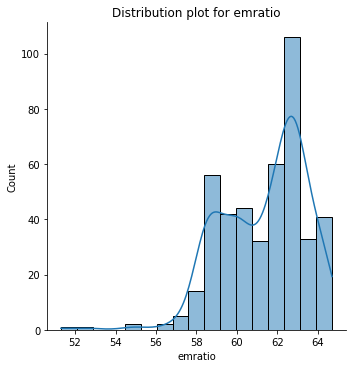

<Figure size 432x288 with 0 Axes>

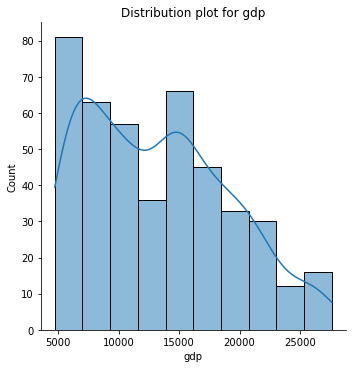

<Figure size 432x288 with 0 Axes>

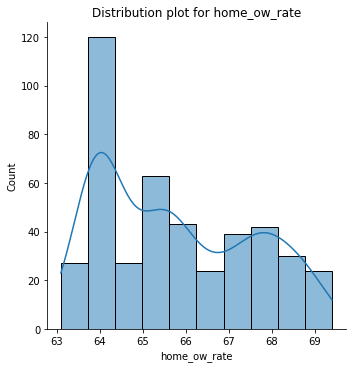

<Figure size 432x288 with 0 Axes>

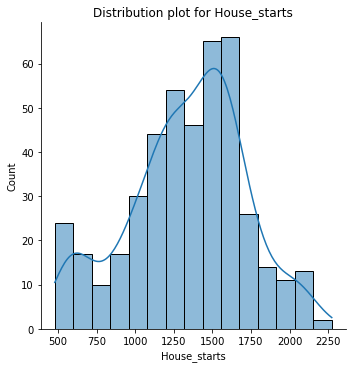

<Figure size 432x288 with 0 Axes>

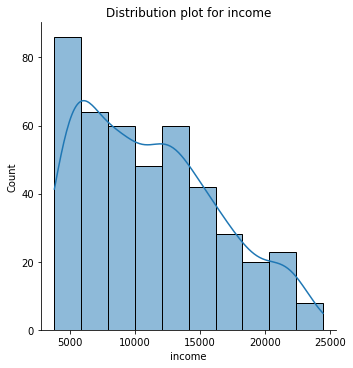

<Figure size 432x288 with 0 Axes>

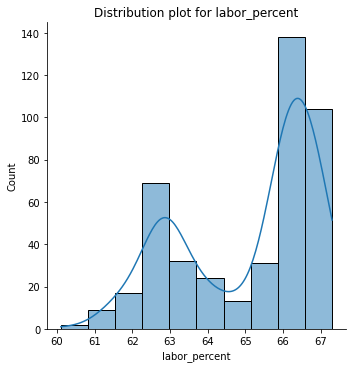

<Figure size 432x288 with 0 Axes>

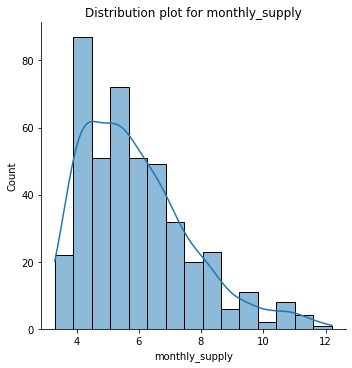

<Figure size 432x288 with 0 Axes>

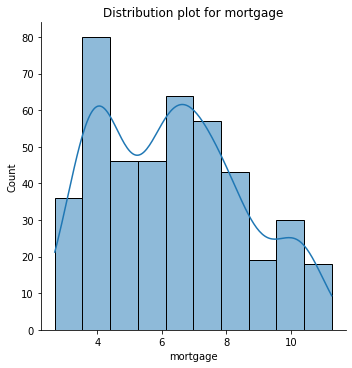

<Figure size 432x288 with 0 Axes>

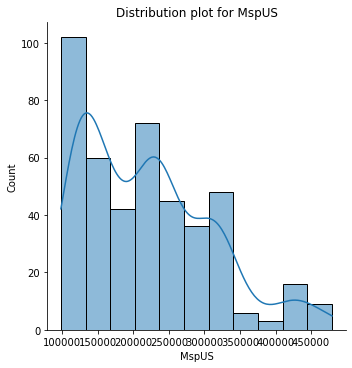

<Figure size 432x288 with 0 Axes>

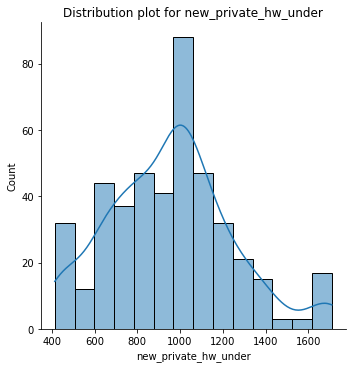

<Figure size 432x288 with 0 Axes>

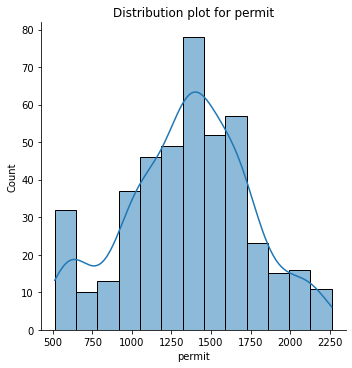

<Figure size 432x288 with 0 Axes>

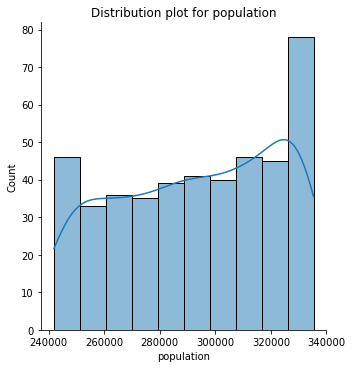

<Figure size 432x288 with 0 Axes>

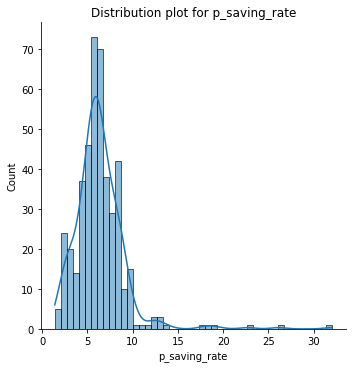

<Figure size 432x288 with 0 Axes>

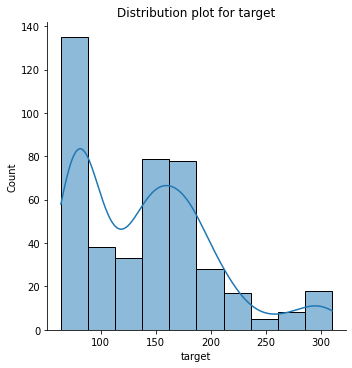

<Figure size 432x288 with 0 Axes>

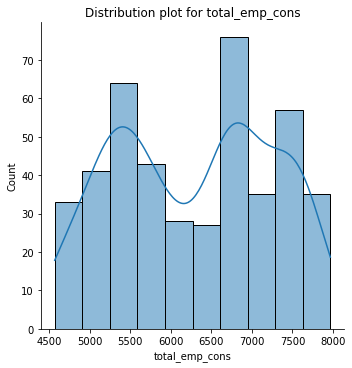

<Figure size 432x288 with 0 Axes>

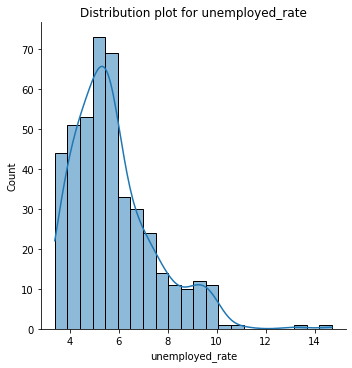

In [9]:
plt.figure(figsize=(12,6))
for col in df_final.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.displot(data=df_final, x=col, kde = True)
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f'Distribution plot for {col}')
    plt.show()

# Plotting boxplot for analyzing the outliers in the data

<Figure size 864x432 with 0 Axes>

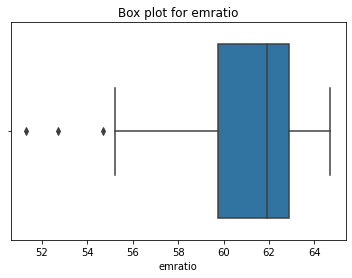

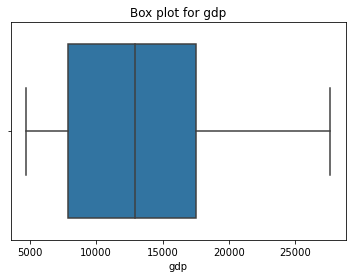

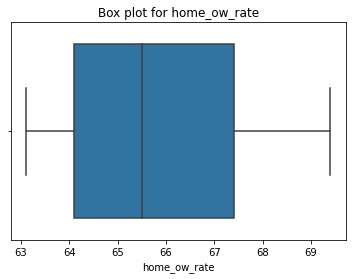

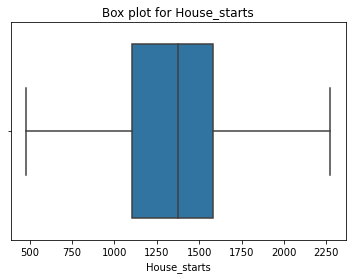

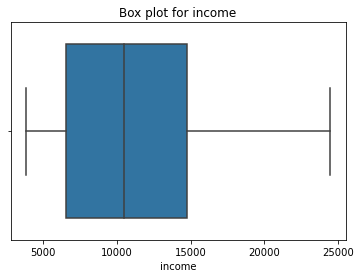

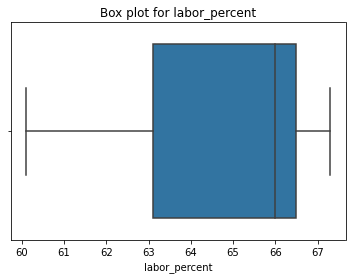

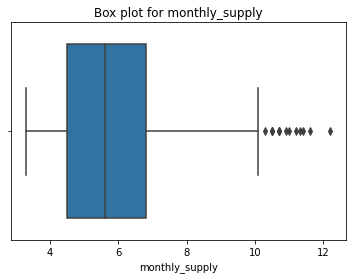

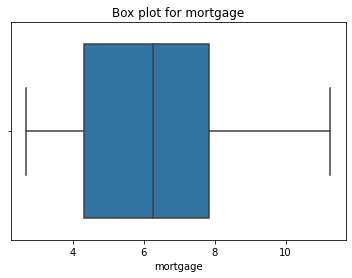

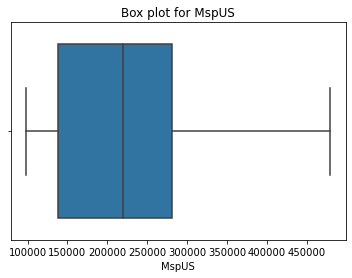

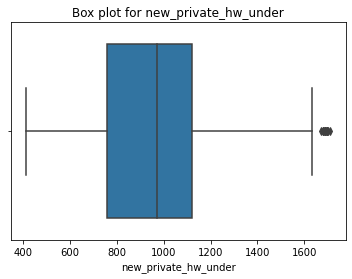

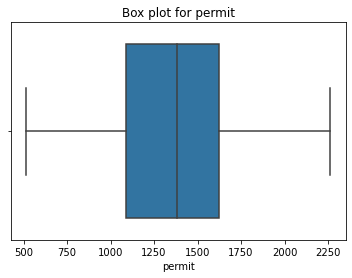

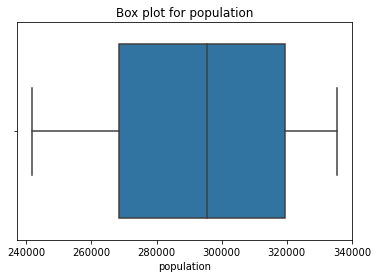

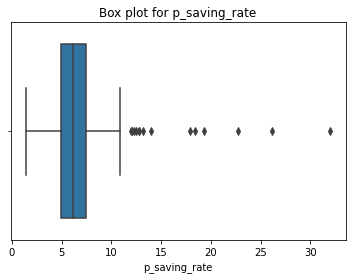

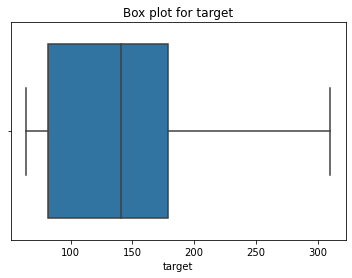

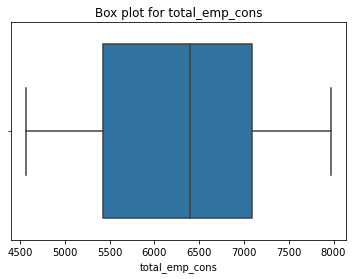

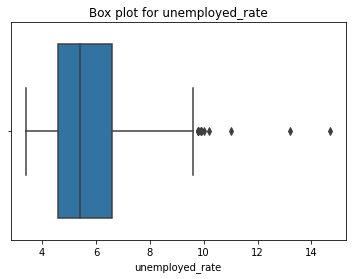

In [10]:
plt.figure(figsize=(12,6))
for col in df_final.columns.tolist():
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_final, x=col)
    plt.xlabel(f"{col}")
    plt.title(f'Box plot for {col}')
    plt.show()

We have outliers in few features

* p_saving_rate

* new_private_house

* emratio

* new_private_hw_under

* monthly_supply

* unemployed_rate

# Treating Skewness and Outliers

# p_saving_rate

In [11]:
df_final['p_saving_rate'].skew()

3.3130896915520984

* Personal saving rate column is highly right skewed.Hence we will apply IQR method for handling outliers

In [14]:
# finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final['p_saving_rate'].quantile(0.25)
q2 = df_final["p_saving_rate"].quantile(0.75)

IQR = q2-q1

In [15]:
lower_bridge = q1-(IQR*1.5)
upper_bridge = q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.0750000000000006
11.275


(None, None)

In [16]:
#capping the features to upper boundry only.
df_final.loc[df_final['p_saving_rate'] >=upper_bridge,'p_saving_rate'] = upper_bridge

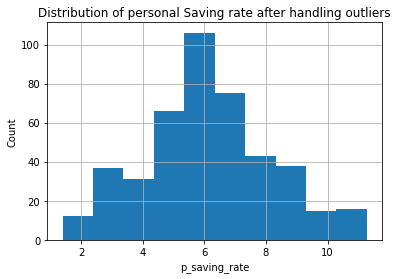

In [17]:
df_final['p_saving_rate'].hist()
plt.title("Distribution of personal Saving rate after handling outliers")
plt.xlabel("p_saving_rate")
plt.ylabel("Count")
plt.show()

# emratio

In [20]:
df_final['emratio'].skew()

-0.7538612695782946

** Employment population ratio column is negatively skewed and having outliers in the mininum side.We are going to apply IQR method for handling outliers.

In [21]:
# finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["emratio"].quantile(0.25)
q2 = df_final["emratio"].quantile(0.75)

IQR = q2-q1

In [22]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

55.025000000000006
67.625


(None, None)

In [23]:
df_final.loc[df_final['emratio'] <=lower_bridge, 'emratio'] = lower_bridge

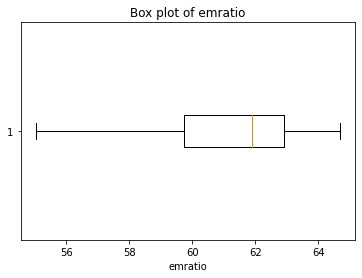

In [24]:
plt.boxplot(df_final['emratio'], vert=False)
plt.xlabel("emratio")
plt.title("Box plot of emratio")
plt.show()

# new_private_hw_under

In [26]:
df_final['new_private_hw_under'].skew()

0.36887282115041053

* New privatye house units under construction column is right skewed.We will applyIQR Method to deal with the outliers

In [27]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["new_private_hw_under"].quantile(0.25)
q2 = df_final["new_private_hw_under"].quantile(0.75)

IQR = q2-q1

In [28]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

215.5
1667.5


(None, None)

In [29]:
df_final.loc[df_final['new_private_hw_under'] >=upper_bridge, 'new_private_hw_under']

DATE
2022-04-01    1669.0
2022-05-01    1680.0
2022-06-01    1688.0
2022-07-01    1683.0
2022-08-01    1702.0
2022-09-01    1698.0
2022-10-01    1710.0
2022-11-01    1695.0
2022-12-01    1696.0
2023-01-01    1695.0
2023-02-01    1686.0
2023-03-01    1680.0
2023-04-01    1680.0
2023-05-01    1687.0
2023-06-01    1692.0
2023-07-01    1697.0
Name: new_private_hw_under, dtype: float64

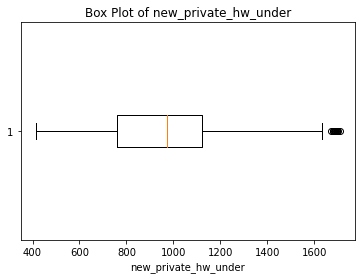

In [30]:
plt.boxplot(df_final['new_private_hw_under'], vert=False)
plt.xlabel("new_private_hw_under")
plt.title('Box Plot of new_private_hw_under')
plt.show()

# Monthly_Supply

In [31]:
df_final['monthly_supply'].skew()

1.0003922160771488

* Monthly supply of houses column is right skewed.we will apply IQR Method to deal with the outlietrs.

In [32]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["monthly_supply"].quantile(0.25)
q2 = df_final["monthly_supply"].quantile(0.75)

IQR = q2-q1

In [33]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.0500000000000003
10.25


(None, None)

In [34]:
df_final.loc[df_final['monthly_supply'] >=upper_bridge, 'monthly_supply'] = upper_bridge

<AxesSubplot:>

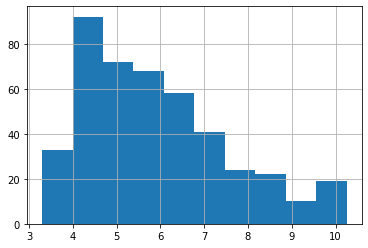

In [35]:
df_final["monthly_supply"].hist()

# Unemployed_rate

In [36]:
df_final["unemployed_rate"].skew()

1.2751925262720107

In [37]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["unemployed_rate"].quantile(0.25)
q2 = df_final["unemployed_rate"].quantile(0.75)

IQR =q2-q1

In [38]:
lowe_bridge = q1-(IQR*1.5)
upper_bridge = q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.0500000000000003
9.6


(None, None)

In [39]:
df_final.loc[df_final['unemployed_rate'] >=upper_bridge, "unemployed_rate"] =upper_bridge

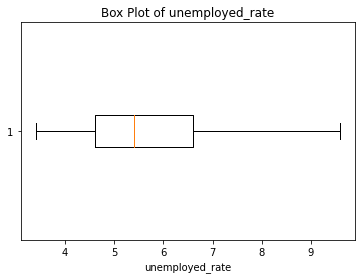

In [41]:
plt.boxplot(df_final['unemployed_rate'], vert=False)
plt.xlabel("unemployed_rate")
plt.title("Box Plot of unemployed_rate")
plt.show()

# Understanding the correlations between thr data

In [42]:
corr_matrix = df_final.corr()
corr_matrix["target"].sort_values(ascending=False)

target                  1.000000
MspUS                   0.980144
gdp                     0.960633
income                  0.955608
population              0.896974
total_emp_cons          0.812130
new_private_hw_under    0.637915
home_ow_rate            0.207294
monthly_supply          0.169504
permit                  0.127189
House_starts           -0.001742
unemployed_rate        -0.249211
p_saving_rate          -0.286001
emratio                -0.538776
mortgage               -0.730709
labor_percent          -0.788313
Name: target, dtype: float64

# Checking Multicollinearity

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_final.columns

vif_data["VIF"] = [variance_inflation_factor(df_final.values, i) for i in range(len(df_final.columns))]

print(vif_data)

                 feature            VIF
0                emratio  771043.613736
1                    gdp    3455.954019
2           home_ow_rate   26103.194160
3           House_starts     463.110976
4                 income    1783.497119
5          labor_percent  774480.101746
6         monthly_supply      78.950759
7               mortgage     200.650987
8                  MspUS    1037.667681
9   new_private_hw_under     470.007361
10                permit     507.762727
11            population   15236.207364
12         p_saving_rate      38.086216
13                target    1128.052143
14        total_emp_cons    2416.117619
15       unemployed_rate    3818.883803


We have high multicollinearity in our data.Need to handle this before fedding into the model

In [46]:
df_final.to_csv("df_final.csv")